# Bilevel LP before solving parametric LP 

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Dustin Kenefake", "Efstratios N. Pistikopoulos"]
__license__ = "Open"
__version__ = "1.0.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


## Problem Statement

In the following example a multi-scale energy systems mixed integer linear program (MILP) is reformulated as a mulitparametric linear program (mpLP)

## Nomenclature

*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t


*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{P}^{uncertain-cap}$ - set of processes with uncertain capacity

$\mathcal{P}^{uncertain-capex}$ - set of processes with uncertain capital expenditure

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making


*Continuous Variables*


$P_{p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$




*Binary Variables*


$X^P_{p,t}$ - network binary for production process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$X^S_{r,t}$ - network binary for inventory of resource r  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$



*Parametric Variables*


$\alpha_{p}$ - uncertainty in production capacity of process p $\in$ $\mathcal{P}^{uncertain-cap}$

$\beta_{r}$ - uncertainty in demand for resource r $\in$ $\mathcal{R}^{demand}$

$\gamma_{r}$ - uncertainty in purchase price for resource r $\in$ $\mathcal{R}^{cons}$

$\delta_{r}$ - uncertainty in consumption availability for resource r $\in$ $\mathcal{R}^{cons}$

$\epsilon_{p}$ - uncertainty in cost of technology for process p $\in$ $\mathcal{P}^{uncertain-capex}$



*Parameters*


$Cap^{P-max}_{p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Capex_{p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$




# MILP Formulation

Given is a general MILP modeling and optimization framework for simultaneous network design and scheduling.




\begin{equation}
    min \sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} Capex_{p,t} \times Cap^P_{p,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}}  Price_{r,t}  \times C_{r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{p \in \mathcal{P}}  Vopex_{r,t} \times P_{r,t} 
\end{equation}


\begin{equation}
    Cap^S_{r,t} \leq Cap^{S-max}_{r,t} \times X^S_{r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{p,t} \leq Cap^{P-max}_{p,t} \times X^P_p  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation} 

\begin{equation}
    P_{p,t} \leq Cap^{P}_{p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{r,t} \leq Cap^{S}_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{r,t} \leq - D_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{r,t} \leq C^{max}_{r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    - S_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    -Inv_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) + C_{r,t} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    S_{r,t}, C_{r,t}, Inv_{r,t}, P_{p,t}, Cap^P_p, Cap^S_r \in R_{\geq 0}
\end{equation}




## mpLP reformulation

Reformulated as an mpLP


\begin{equation}
    min \hspace{1cm} \sum_{p \in \mathcal{P}} Capex_p \times \epsilon_p \times P_p + \sum_{r \in \mathcal{R}^{cons}} C_r \times \gamma_r 
\end{equation}


\begin{equation}
    Inv_r \leq Cap^{S-max}_r \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    - S_r \leq - D_r \times \beta_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    C_r \leq C^{max}_r \times \delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons} 
\end{equation}

\begin{equation}
    P_p \leq Cap^{P-max}_p \times \alpha_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation} 

\begin{equation}
    - S_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}
\end{equation}

\begin{equation}
    - Inv_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) + C_{r} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \alpha_p \in A_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}

\begin{equation}
    \beta_r \in B_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    \gamma_r \in \Gamma_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \delta_r \in \Delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \epsilon_p \in E_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}


\begin{equation}
    S_r, C_r, Inv_r, P_p \in R_{\geq 0}
\end{equation}


## Example Problem


\begin{equation}
    p \in \{LI_c, LI_d, WF, PV\} 
\end{equation}


\begin{equation}
    r \in \{charge, power, wind, solar\} 
\end{equation}



\begin{equation}
    min \hspace{1cm} \left[\begin{matrix}1302\\0\\990\\567\end{matrix}\right]^T \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}Inv_{charge}\\C_{wind}\\C_{solar}\\P_{LI_c}\\P_{LI_d}\end{matrix}\right] \leq \left[\begin{matrix} 100\\100\\100\\100\\100\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}-S_{power}\\P_{WF}\\P_{PV}\end{matrix}\right] \leq \left[\begin{matrix}-300 & 0 & 0\\0 & 100 & 0\\0 & 0 & 100\end{matrix}\right] \left[\begin{matrix}\beta_{power}\\ \alpha_{WF}\\\alpha_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_4\left[\begin{matrix} - Inv_{charge} \\ -S_{power} \\ C_{wind} \\ C_{solar} \end{matrix}\right] + \left[\begin{matrix}0.89 & -1 & 0 & 0\\-1 & 1 & 0.85 & 0.75\\0 & 0 & -1 & 0\\0 & 0 & 0 & -1\end{matrix}\right] \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right] = 0
\end{equation}



\begin{equation}
    \alpha_p \in \mathcal{A}_p \hspace{1cm} \forall p \in \{WF, PV\} 
\end{equation}

\begin{equation}
    \beta_r \in \mathcal{B}_r \hspace{1cm} \forall r \in \{Power\} 
\end{equation}

$\textbf{Import modules}$

In [1]:
import ppopt

In [3]:
help(ppopt.mpqp_program)

AttributeError: module 'ppopt' has no attribute 'mpqp_program'

In [1]:
import sys
sys.path.append('src')

In [2]:
from energiapy.components.result import Result
# import polytope as pt
from ppopt.plot import parametric_plot
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.mplp_program import MPLP_Program
from ppopt.mpqp_program import MPQP_Program
import numpy
import pandas
import sympy
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario
from energiapy.model.formulate import formulate, Constraints, Objective, ModelClass
from energiapy.components.scenario import Scenario
from energiapy.components.location import Location
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.material import Material
from energiapy.components.temporal_scale import TemporalScale
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.utils.math_utils import min_max, normalize
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt 

import pandas
import numpy as np
import matplotlib.pyplot as plt
#import keras_tuner
from pandas import read_csv
import math
import h5py
from keras.models import Sequential
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Dense, Activation, Dropout, LSTM
from scipy.signal import savgol_filter
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import scipy.stats as stats

## Calculate power outputs from solar and wind data; demand

In [6]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)

solar = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

wind = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

# Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region
ercot = pandas.read_csv('data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value
ercot.columns = ['Value']
demand = ercot
index = demand.index


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_17140\2349302074.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_17140\2349302074.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ercot.index = pandas.to_datetime(ercot.index, utc = True)


## normalize the varying factors

In [7]:
solar = normalize(solar)
wind = normalize(wind)
demand = normalize(demand)

In [8]:
# plt.plot(solar, color = 'red')
# plt.plot(wind, color = 'blue')
# plt.plot(demand, color = 'green')


In [9]:
solar = pandas.DataFrame(data = solar, index= index)
wind = pandas.DataFrame(data = wind, index= index)
demand = pandas.DataFrame(data = demand, index= index)


In [10]:
def runner(filtered_data):
	# convert an array of values into a dataset matrix
	def create_dataset(dataset, look_back=1):
		dataX, dataY = [], []
		for i in range(len(dataset)-look_back-1):
			a = dataset[i:(i+look_back), 0]
			dataX.append(a)
			dataY.append(dataset[i + look_back, 0])
		return np.array(dataX), np.array(dataY)

	all_y = filtered_data.values
	dataset=all_y.reshape(-1, 1)

	# normalize the dataset
	scaler = MinMaxScaler(feature_range=(0, 1))
	dataset = scaler.fit_transform(dataset)

	# split into train and test sets, 30% test data, 70% training data
	train_size = int(len(dataset) * 0.7)
	test_size = len(dataset) - train_size
	train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

	# reshape into X=t and Y=t+1, timestep 240
	look_back = 150
	trainX, trainY = create_dataset(train, look_back)
	testX, testY = create_dataset(test, look_back)

	# reshape input to be [samples, time steps, features]
	trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
	testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

	# model = tf.keras.Sequential([
	#     tf.keras.layers.LSTM(5,return_sequences=True,activation='relu'), 
	#     tf.keras.layers.Dropout(0.10),
	#     tf.keras.layers.LSTM(50,return_sequences=True,activation='relu'),
	#     tf.keras.layers.Dropout(0.10),
	#     tf.keras.layers.LSTM(20),
	# ])

	learning_rate = 0.0005
	model = Sequential()
	model.add(LSTM(128, input_shape=(1, look_back)))
	model.add(Dropout(0.25))
	#model.add(LSTM(50, return_sequences=True, activation='relu'))
	model.add(Dense(1))
	optimizer = Adam(learning_rate=learning_rate)
	model.compile(loss='mse', optimizer=optimizer)

	# Train the model
	history = model.fit(trainX, trainY, epochs=500, batch_size=240, verbose=1, validation_data=(testX, testY))

	# Extract loss values from history
	train_loss = history.history['loss']
	val_loss = history.history['val_loss']

	# Plot training loss and validation loss
	plt.plot(train_loss, label='Train Loss')
	plt.plot(val_loss, label='Validation Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.title('Training and Validation Loss')
	plt.legend()
	plt.show()

	def run_monte_carlo_dropout(model, X, n_samples=30):
		"""
		Run Monte Carlo Dropout for making predictions.

		Parameters:
		model (keras.Model): The trained LSTM model.
		X (numpy.array): Input data for predictions.
		n_samples (int): Number of samples to draw.

		Returns:
		numpy.array: Mean predictions.
		numpy.array: Standard deviation of predictions.
		"""
		predictions = np.zeros((n_samples, X.shape[0], X.shape[1]))

		for i in range(n_samples):
			predictions[i] = model.predict(X)

		mean_predictions = np.mean(predictions, axis=0)
		std_predictions = np.std(predictions, axis=0)

		return mean_predictions, std_predictions

	n_samples = 30  # Number of MC Dropout samples
	mean_predictions, std_predictions= run_monte_carlo_dropout(model, testX, n_samples)

	mean_predictions = scaler.inverse_transform(mean_predictions.reshape(-1, 1)).flatten()
	mean_predictions = np.exp(mean_predictions)
	std_predictions = scaler.inverse_transform(std_predictions.reshape(-1, 1)).flatten()
	std_predictions = np.exp(std_predictions) 

	# make predictions
	trainPredict = model.predict(trainX)
	testPredict = model.predict(testX)

	# invert predictions
	trainPredict = scaler.inverse_transform(trainPredict)
	trainPredict = np.exp(trainPredict)
	trainY = scaler.inverse_transform([trainY])
	trainY = np.exp(trainY)
	testPredict = scaler.inverse_transform(testPredict)
	testPredict = np.exp(testPredict)
	testY = scaler.inverse_transform([testY])
	testY = np.exp(testY)

	# calculate root mean squared error
	trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
	print('Train Score: %.2f RMSE' % (trainScore))
	testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
	print('Test Score: %.2f RMSE' % (testScore))
	# Plot original data, mean predictions, and confidence intervals




	plt.plot(testY.flatten(), label='True Values', color= 'blue')
	plt.plot(mean_predictions.flatten(), label='Mean Predictions', color = 'red')
	plt.fill_between(
		range(len(mean_predictions.flatten())),
		mean_predictions.flatten() - 1.44 * std_predictions.flatten(),
		mean_predictions.flatten() + 1.44 * std_predictions.flatten(),
		color='blue', alpha=0.3, label='85% Confidence Intervals'
	)
	plt.fill_between(
		range(len(mean_predictions.flatten())),
		mean_predictions.flatten() - 1.96 * std_predictions.flatten(),
		mean_predictions.flatten() + 1.96 * std_predictions.flatten(),
		color='red', alpha=0.3, label='95% Confidence Intervals'
	)
	plt.legend()
	plt.show()
	last_sequence = dataset[-look_back:]
	num_predictions = 30

	predicted_values = []



	for _ in range(num_predictions):
		last_sequence_reshaped = np.reshape(last_sequence, (1, 1, look_back))
		predicted_value = model.predict(last_sequence_reshaped)
		predicted_values.append(predicted_value[0, 0])
		last_sequence = np.append(last_sequence[1:], predicted_value[0])

	# Invert the predictions back to the original scale
	predicted_values = scaler.inverse_transform([predicted_values])
	predicted_values = np.exp(predicted_values)
	print(predicted_values)
	# Generate a date range for the future predictions
	start_date = pandas.to_datetime(solar.index[-1]) + pandas.DateOffset(days=1)  # Assuming the last date in dt is the latest date
	end_date = start_date + pandas.DateOffset(days=num_predictions-1)
	future_dates = pandas.date_range(start=start_date, end=end_date)
	predicted_values = np.reshape(predicted_values, (num_predictions,))
	predicted_df = pandas.DataFrame(predicted_values, index=future_dates, columns=['Predicted'])


	last_sequence = dataset[-look_back:]
	num_predictions = 24

	predicted_values = []

	for _ in range(num_predictions):
		last_sequence_reshaped = np.reshape(last_sequence, (1, 1, look_back))
		predicted_value = model.predict(last_sequence_reshaped)
		predicted_values.append(predicted_value[0, 0])
		last_sequence = np.append(last_sequence[1:], predicted_value[0])

	# Invert the predictions back to the original scale
	predicted_values = scaler.inverse_transform([predicted_values])
	predicted_values = np.exp(predicted_values)


	future_dates = pandas.date_range(start='2021-01-01 00:00:00+00:00', end='2021-01-01 23:00:00+00:00', freq='H')
	predicted_values = np.reshape(predicted_values, (24,))
	predicted_df = pandas.DataFrame(predicted_values, index=future_dates, columns=['Predicted'])
	predicted_df

	rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
	print('RMSE:', rmse)
	mape = np.mean(np.abs((testY[0] -testPredict[:,0]) / testY[0])) * 100
	print('MAPE:', mape)
	r2 = r2_score(testY[0], testPredict[:,0])
	print('R-squared:', r2)

	def mda(actual, predicted):
		actual_direction = np.sign(np.diff(actual))
		predicted_direction = np.sign(np.diff(predicted))
		correct_directions = np.sum(actual_direction == predicted_direction)
		mda_value = correct_directions / (len(actual_direction) - 1)
		return mda_value

	mda_value = mda(testY[0], testPredict[:,0])
	print('MDA:', mda_value)
	std_p = np.std(predicted_values)
	std_error = std_p/np.sqrt(num_predictions)
	return predicted_df, std_error


	

In [11]:
numpy.std(wind)

0    0.228473
dtype: float64

Epoch 1/500



128/128 [==============================] - 3s 10ms/step - loss: 0.0214 - val_loss: 0.0105
Epoch 2/500
128/128 [==============================] - 1s 6ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 3/500
128/128 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0046
Epoch 4/500
128/128 [==============================] - 1s 5ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 5/500
128/128 [==============================] - 1s 6ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 6/500
128/128 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 7/500
128/128 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 8/500
128/128 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 9/500
128/128 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 10/500
128/128 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 0.0023


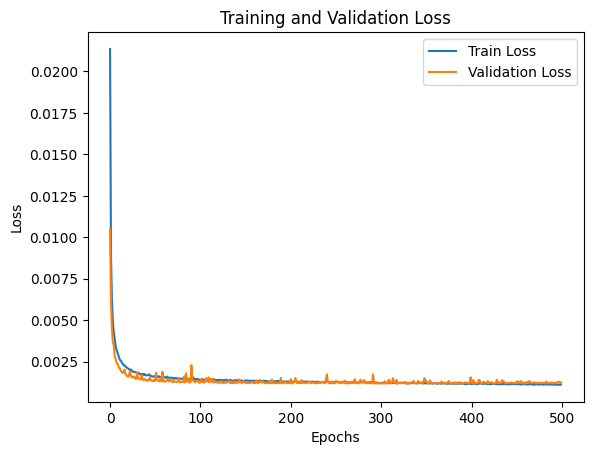

406/406 [==============================] - 1s 2ms/step
Train Score: 0.05 RMSE
Test Score: 0.06 RMSE


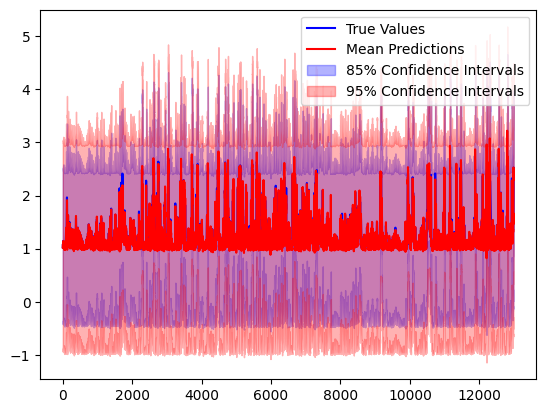

1/1 [==============================] - 0s 23ms/step
[[2.50959003 2.48879885 2.48024583 2.47551492 2.46725622 2.45350853
  2.43372864 2.35407293 2.20037094 2.00160974 1.82030222 1.71295078
  1.72525172 1.84530496 2.01207598 2.13907751 2.24293446 2.29497218
  2.35059544 2.37246743 2.3498086  2.2638774  2.11764579 2.04663104
  2.10673501 2.13404201 2.12908334 2.09559476 2.01755122 1.90987035]]
1/1 [==============================] - 0s 33ms/step
RMSE: 0.05591047477475219
MAPE: 2.204482412958157
R-squared: 0.9718973604214359
MDA: 0.6541422851863259


In [12]:
wind_pred, error = runner(wind)

In [13]:
def calculate_confidence_interval(predictions, standard_error, confidence_level=0.95):
    """Calculates the confidence interval for a given set of predictions.

    Args:
        predictions: A list of predictions.
        standard_error: The standard error of the predictions.
        confidence_level: The desired confidence level.

    Returns:
        A list of confidence intervals, where each confidence interval is a tuple of
        (lower bound, upper bound).
    """

    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    confidence_intervals = []
    for prediction in predictions:
        lower_bound = prediction - z_score * standard_error
        upper_bound = prediction + z_score * standard_error
        confidence_intervals.append((lower_bound, upper_bound))
    confidence_intervals_df = pandas.DataFrame(confidence_intervals, columns=['lower_bound', 'upper_bound'])
    confidence_intervals_df.index = predictions.index
    return confidence_intervals_df



In [14]:

ci_99 = calculate_confidence_interval(wind_pred['Predicted'], error, 0.99)
ci_95 = calculate_confidence_interval(wind_pred['Predicted'], error, 0.95)
ci_90 = calculate_confidence_interval(wind_pred['Predicted'], error, 0.90)
ci_85 = calculate_confidence_interval(wind_pred['Predicted'], error, 0.85)

In [15]:
max_ = max(ci_99['upper_bound'])
wind_pred = wind_pred/max_
ci_99 = ci_99/max_
ci_95 = ci_95/max_
ci_90 = ci_90/max_
ci_85 = ci_85/max_

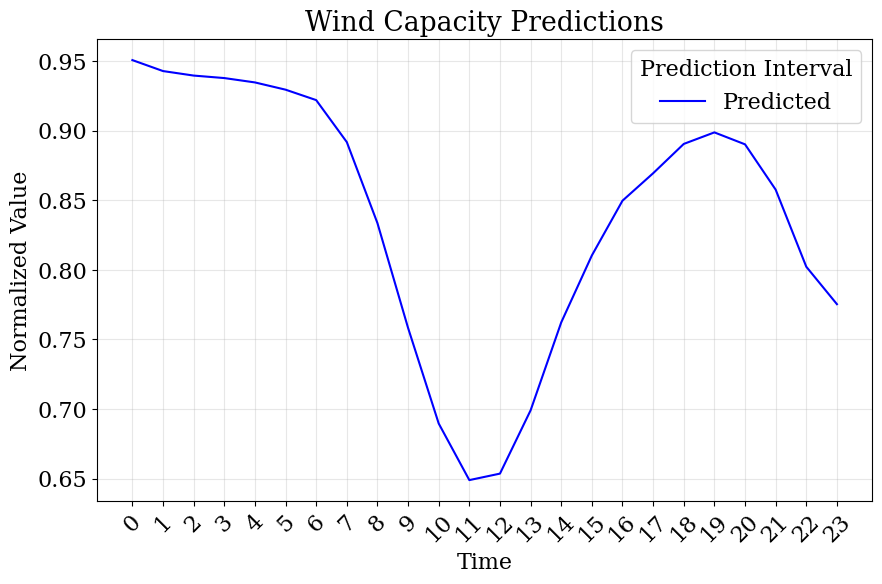

In [19]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(normalize(obj3), normalize(obj4), s=10, color='steelblue')
ax.plot(wind_pred.index, wind_pred['Predicted'], color='blue', label='Predicted')
# ax.fill_between(ci_99.index, ci_99['lower_bound'], ci_99['upper_bound'], color='darkred', alpha=0.5, label='99%')
# ax.fill_between(ci_95.index, ci_95['lower_bound'], ci_95['upper_bound'], color='maroon', alpha=0.5, label='95%')
# ax.fill_between(ci_90.index, ci_90['lower_bound'], ci_90['upper_bound'], color='indianred', alpha=0.5, label='90%')
# ax.fill_between(ci_85.index, ci_85['lower_bound'], ci_85['upper_bound'], color='lightcoral', alpha=0.5, label='85%')


# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
# ax.set_xticklabels(list(range(24)))

xtick_positions = np.linspace(0, 24, 24)

plt.xticks(wind_pred.index, list(range(24)), rotation = 45)
plt.legend(title = 'Prediction Interval')
plt.title(f'Wind Capacity Predictions')
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.grid(alpha=0.3)
plt.rcdefaults()

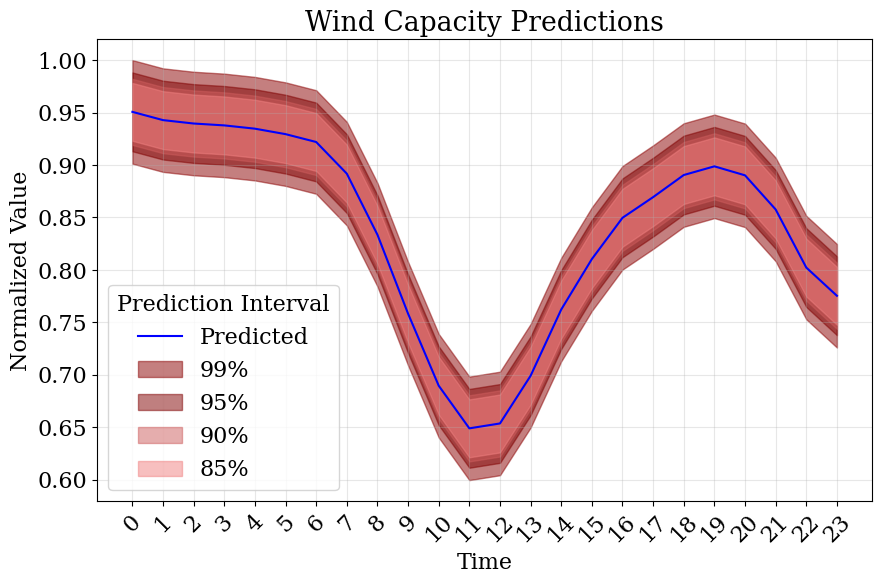

In [18]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(normalize(obj3), normalize(obj4), s=10, color='steelblue')
ax.plot(wind_pred.index, wind_pred['Predicted'], color='blue', label='Predicted')
ax.fill_between(ci_99.index, ci_99['lower_bound'], ci_99['upper_bound'], color='darkred', alpha=0.5, label='99%')
ax.fill_between(ci_95.index, ci_95['lower_bound'], ci_95['upper_bound'], color='maroon', alpha=0.5, label='95%')
ax.fill_between(ci_90.index, ci_90['lower_bound'], ci_90['upper_bound'], color='indianred', alpha=0.5, label='90%')
ax.fill_between(ci_85.index, ci_85['lower_bound'], ci_85['upper_bound'], color='lightcoral', alpha=0.5, label='85%')


# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
# ax.set_xticklabels(list(range(24)))

xtick_positions = np.linspace(0, 24, 24)

plt.xticks(wind_pred.index, list(range(24)), rotation = 45)
plt.legend(title = 'Prediction Interval')
plt.title(f'Wind Capacity Predictions')
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.grid(alpha=0.3)
plt.rcdefaults()

## model for single time period

In [ ]:

scales = TemporalScale(discretization_list=[1])

Solar = Resource(name='Solar', cons_max=100, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=100, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', label='Power generated', demand = True)#, varying = [VaryingResource.UNCERTAIN_DEMAND], 
                #  varying_bounds  = (demand_ci['lower_bound'][index_],demand_ci['upper_bound'][index_]))#(min(demand['COAST']), 1))
H2O = Resource(name='H2O', cons_max=500, basis='tons', label='Water')

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

H2 = Resource(name='H2', basis='tons', label='Hydrogen', demand= True) #, varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (0.6, 0.8))

Uranium = Resource(name='Uranium', cons_max=1000,
                price=42.70/(250/2), basis='kg', label='Uranium')

LiI = Process(name='LiI', storage=Power, vopex=1302, capex=0, fopex=0,  prod_max=200,
            storage_loss=0.11,  label='Lithium-ion battery', basis='MW', store_max=200)

WF = Process(name='WF', conversion={Wind: -1, Power: 0.85}, vopex=990, capex=0, fopex=0,
            prod_max=100, label='Wind mill array', basis='MW', varying = [VaryingProcess.UNCERTAIN_CAPACITY], 
            varying_bounds = (0,1))

PV = Process(name='PV', conversion={Solar: -1, Power: 0.75}, vopex=567, capex=0, fopex=0,
            prod_max=100, label='Solar PV', basis='MW')#, varying = [VaryingProcess.UNCERTAIN_CAPACITY], 
            # varying_bounds = (solar_ci['lower_bound'][index_],solar_ci['upper_bound'][index_]))

PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, H2O: -3.1839}, capex=0, fopex=0,
            vopex=1.55*10**3, prod_max=100, cap_min = 0, basis = 'tons', label = 'PEM' )

ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1},
            capex=7988951, fopex=0.04*0.730, vopex=7988, prod_max=100, label='Small modular reactors (SMRs)', block='power_gen')

region = Location(name='region', processes={
                LiI, WF, ASMR}, scales=scales, label='some region wo dispatchable')
scenario = Scenario(name='example', demand={region: {Power:60}}, network=region, scales=scales, label='example scenario')
matrix = formulate(scenario=scenario, model_class=ModelClass.MPLP)
# print(matrix)
# return matrix
# print(scenario.b_df)



The problem has the following variables:
Resource inventory level (Inv) x 1
Exact resource discharge (Sf) x 1
Uncertain resource discharge (S) x 0
Exact resource availability (Af) x 3
Uncertain resource availability (A) x 0
Exact resource price (Cf) x 3
Uncertain resource price (C) x 0
Exact process production (Pf) x 3
Uncertain process production (P) x 1
 For a total of 9 (8 fixed, and 1 uncertain)


## get program for single time period

In [ ]:
prog = MPLP_Program(matrix['A'], matrix['b'], matrix['c'], matrix['H'],
                    matrix['CRa'], matrix['CRb'], matrix['F'], equality_indices=list(range(matrix['no_eq_cons'])))

## correct error in storage 

In [ ]:
matrix['A'][0][6] = -1 
matrix['A'][0][7] = 1 

## cost matrix (objective)

In [ ]:
scenario.c_df

,0
Inv_LiI_Power_stored,0.0000
Sf_Power,0.0000
Af_H2O,0.0000
Af_Uranium,0.3416
Af_Wind,0.0000
Pf_ASMR,7988.0000
Pf_LiI,1302.0000
Pf_LiI_discharge,0.0000
P_WF,990.0000


In [ ]:
scenario.make_conversion_df()

,H2O,Power,Wind,LiI_Power_stored,Uranium
LiI_discharge,0.000,0.89,0.0,-1.0,0.000000
WF,0.000,0.85,-1.0,0.0,0.000000
LiI,0.000,-1.00,0.0,1.0,0.000000
ASMR,-3.364,1.00,0.0,0.0,-0.000042


## Constrants are generally A_mat @ x_vector = b_mat

In [ ]:
scenario.A_df

,Inv_LiI_Power_stored,Sf_Power,Af_H2O,Af_Uranium,Af_Wind,Pf_ASMR,Pf_LiI,Pf_LiI_discharge,P_WF
MB_H2O(=),1.0,0.0,0.0,0.0,0.0,0.000000,-1.0,1.00,0.00
MB_LiI_Power_stored(=),0.0,-1.0,0.0,0.0,0.0,1.000000,-1.0,0.89,0.85
MB_Power(=),0.0,0.0,1.0,0.0,0.0,-3.364000,0.0,0.00,0.00
MB_Uranium(=),0.0,0.0,0.0,1.0,0.0,-0.000042,0.0,0.00,0.00
MB_Wind(=),0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.00,-1.00
Inv_LiI_Power_stored(<),1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00
Sf_Power(>),0.0,-1.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00
Af_H2O(<),0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.00,0.00
Af_Uranium(<),0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.00,0.00
Af_Wind(<),0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.00,0.00


In [ ]:
prog.display_latex()

$$\min_{x}\left[\begin{matrix}0\\0\\0\\0.3416\\0\\7.988e+03\\1.302e+03\\0\\990.0\end{matrix}\right]^T\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\end{matrix}\right]$$
$$\left[\begin{matrix}1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0\\-1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0\end{matrix}\right]\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}

$$\min_{x}\left[\begin{matrix}0\\0\\0\\0.3416\\0\\7.988e+03\\1.302e+03\\0\\990.0\end{matrix}\right]^T\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\end{matrix}\right]$$
$$\left[\begin{matrix}1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0\\-1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0\end{matrix}\right]\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\end{matrix}\right]\leq\left[\begin{matrix}30.0\\-100.0\\500.0\\1e+03\\100.0\\100.0\\100.0\\100.0\\100.0\\0\\0\\0\\0\\0\\0\\0\\0\\0\end{matrix}\right]+\left[\begin{matrix}0\\0\\0\\0\\0\\0\\0\\0\\-1.0\\0\\0\\0\\0\\0\\0\\0\\0\\0\end{matrix}\right]\left[\begin{matrix}\theta_{0}\end{matrix}\right]$$
$$\left[\begin{matrix}1.0 & 0 & 0 & 0 & 0 & 0 & 1.0 & -1.0 & 0\\0 & -1.0 & 0 & 0 & 0 & 1.0 & -1.0 & 0.89 & 0.85\\0 & 0 & 1.0 & 0 & 0 & -3.364 & 0 & 0 & 0\\0 & 0 & 0 & 1.0 & 0 & -1.0 10^{4.1700000000000004e-05} & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & -1.0\end{matrix}\right]\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\end{matrix}\right]=\left[\begin{matrix}0\\0\\0\\0\\0\end{matrix}\right]+\left[\begin{matrix}0\\0\\0\\0\\0\end{matrix}\right]\left[\begin{matrix}\theta_{0}\end{matrix}\right]$$
$$\left[\begin{matrix}1.0\\-1.0\end{matrix}\right]\left[\begin{matrix}\theta_{0}\end{matrix}\right]\leq\left[\begin{matrix}1.0\\0\end{matrix}\right]$$

In [ ]:
time_periods = 24

## Converting a single time period problem into multiperiod

Done by diagonalizing the A matrix

Step1: diagonalizing the A matrix

In [ ]:
from scipy.linalg import block_diag
A = block_diag(*[matrix['A'] for x in range(time_periods)])

Step2: providing connectivity (inventory moves from one time period to another)

In [ ]:
for i in range(time_periods -1):
    x_cord = i*9
    y_cord = (i+1)*(23)
    A[y_cord, x_cord] = -1

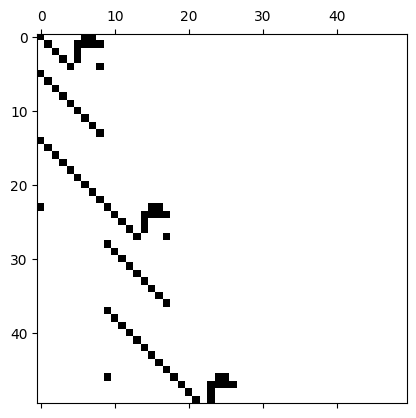

In [ ]:
plt.spy(A[:50,:50])

## Stacking the rest of the matrices

In [ ]:
c = numpy.vstack([matrix['c'] for _ in range(time_periods)])

In [ ]:
F = numpy.vstack([matrix['F'] for _ in range(time_periods)])

In [ ]:
b = numpy.vstack([matrix['b'] for _ in range(time_periods)])

In [ ]:
for i in range(time_periods):
    b[23*i+13] = wind_pred.to_numpy()[i]*100

## Critical regions

In [ ]:
A_t = numpy.array([[1],[-1]])
b_t = numpy.array([[6],[0]])

# make the quality indices

## setting of equality indices 

In [ ]:

eqs = [[0+i*23,1+i*23,2+i*23,3+i*23,4+i*23] for i in range(time_periods)]
eqs = sum(eqs, [])
# eqs

## Building multiperiod program

In [ ]:
from ppopt.mplp_program import MPLP_Program
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm

prog = MPLP_Program(A, b, c, numpy.zeros((1,time_periods*9)).T,
                    A_t, b_t, F, equality_indices=eqs)

In [ ]:
# from pickle import dump

# dump(prog, open('mama_mia10.dummpy', 'wb'))

In [ ]:
# prog = pickle.load(open('mama_mia10.dummpy','rb'))


In [ ]:

prog.solver.solvers['lp'] = 'gurobi'
prog.b[0] = 20
prog.process_constraints()
# prog.b[0] = 

# for i in range(24):
    
    
    # prog.b[24*5 + 9*i + 18] = 50


Restricted license - for non-production use only - expires 2025-11-24


## Providing decisions taken earlier in the planning horizon higher weights

In [ ]:
for i in range(24):
    prog.c[0 + 9*i] = 0 * (1 - 0.0001)**i
    prog.c[1 + 9*i] = -10 * (1 - 0.0001)**i
    prog.c[2 + 9*i] = 10 * (1 - 0.0001)**i
    prog.c[3 + 9*i] = 10000 * (1 - 0.0001)**i
    # prog.c[4 + 9*i] = 0
    prog.c[5 + 9*i] = 100000 * (1 - 0.0001)**i
    prog.c[6 + 9*i] = 0 * (1 - 0.0001)**i
    prog.c[7 + 9*i] = 0 * (1 - 0.0001)**i
    prog.c[8 + 9*i] = 0 * (1 - 0.0001)**i
    

[(array([0.]), 'Inv'),
 (array([0.]), 'Sale of Power'),
 (array([0.]), 'Cons. H20'),
 (array([0.3416]), 'Cons. U'),
 (array([0.]), 'Cons. Wind'),
 (array([7988.]), 'Prod. Nucluer'),
 (array([1302.]), 'Prod. LiIon'),
 (array([0.]), 'Prod. LiIon Discharch'),
 (array([990.]), 'Prod. Windfarm')]

## Solution algorithm by Dustin

In [ ]:
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm

In [ ]:
prog.solve_theta(numpy.array([[3]])).active_set, prog.num_constraints()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 121, 126, 127, 128, 130, 131, 136, 141, 142, 143,
        145, 146, 147, 151, 156, 157, 158, 160, 161, 162, 166, 171, 172,
        173, 175, 176, 177, 181, 186, 187, 188, 190, 191, 192, 196, 201,
        202, 203, 205, 206, 207, 211, 216, 217, 218, 220, 221, 222, 226,
        231, 232, 233, 235, 236, 237, 241, 246, 247

In [ ]:
prog.solve_theta(numpy.array([[0]])).active_set

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 125, 127, 128, 130, 132, 135, 140, 142, 143, 145,
       147, 150, 155, 157, 158, 160, 162, 165, 170, 172, 173, 175, 177,
       180, 185, 187, 188, 190, 192, 195, 200, 202, 203, 205, 207, 210,
       215, 217, 218, 220, 222, 225, 230, 232, 233, 235, 237, 240, 245,
       247, 248, 250, 252, 255, 260, 262, 263, 265, 266, 270, 27

In [ ]:
from ppopt.utils.constraint_utilities import is_full_rank

is_full_rank(prog.A[prog.equality_indices])

True

In [ ]:
theta = numpy.linspace(0.0001, 5.9999, 100)

In [ ]:
sols = [prog.solve_theta(numpy.array([[t]])) for t in theta]
sols_obj = [sol.obj.flatten() for sol in sols if sol is not None]

In [ ]:
import matplotlib.pyplot as plt

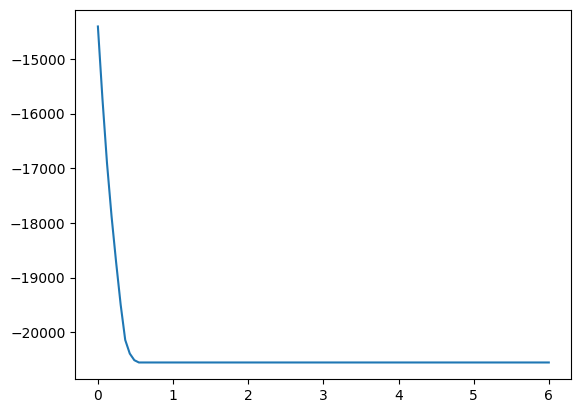

In [ ]:
plt.plot(theta, sols_obj)

In [ ]:
x = prog.solve_theta(numpy.array([[3]]))

In [ ]:
count = 0
for index, i in enumerate(x.dual):
    if not numpy.isclose(i, 0):
        count += 1
print(count)

216


In [ ]:
sol2 = prog.solve_theta(numpy.array([[2]]))
sol3 = prog.solve_theta(numpy.array([[3]]))

In [ ]:
sol0 = prog.solve_theta(numpy.array([[0]]))

In [ ]:
A = sol3.sol - sol2.sol
b = sol0.sol

In [ ]:
# from scipy import stats

# stats.zscore(theta, axis=None)

In [ ]:
A[:9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
prog.c.T@(b + A*6)

array([-14403.19377815])

In [ ]:
prog.c[:9]

array([[ 0.e+00],
       [-1.e+01],
       [ 1.e+01],
       [ 1.e+04],
       [ 0.e+00],
       [ 1.e+05],
       [ 0.e+00],
       [ 0.e+00],
       [ 0.e+00]])

In [ ]:
# Inv
# Sale of Power
# Cons. H20
# Cons. U
# Cons. Wind
# Prod. Nucluer
# Prod. LiIon
# Prod. LiIon Discharch
# Prod. Windfarm

## Plotting of solution

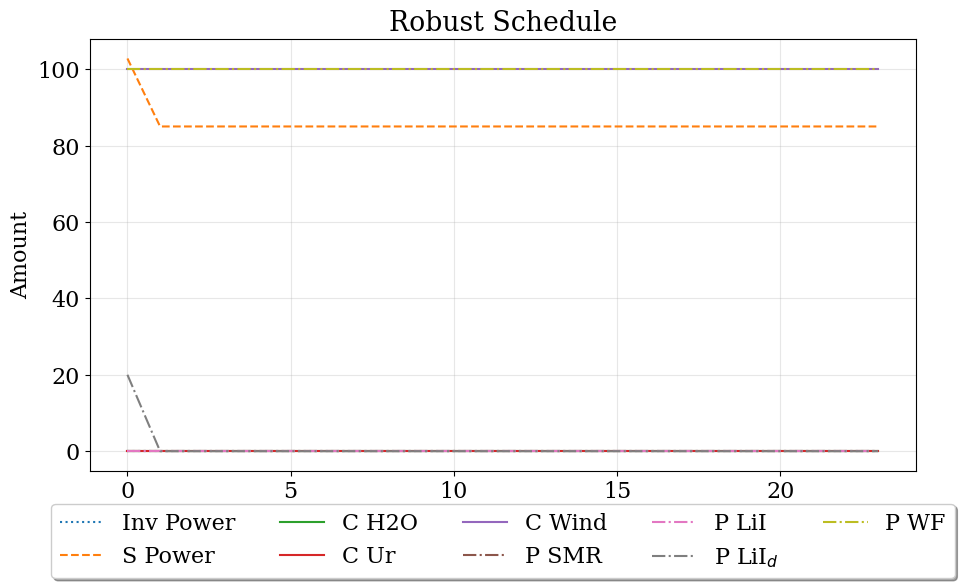

In [ ]:
sol3 = prog.solve_theta(numpy.array([[5.9]]))
# sol3 = prog.solve_theta(numpy.array([[0.1]]))


# time_sols = sol3.sol.reshape(24, -1)
# plt.subplots(figsize=(20, 10))
# labels = ['Inv','Sale of Power','Cons. H20','Cons. U','Cons. Wind','Prod. Nucluer','Prod. LiIon','Prod. LiIon Discharch','Prod. Windfarm']
# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)
# plt.savefig('baba.pdf')

# plt.subplots(figsize=(20, 10))
time_sols = sol3.sol.reshape(24, -1)
labels = ['Inv Power','S Power','C H2O','C Ur','C Wind','P SMR','P LiI',r'P LiI$_d$','P WF']
lines = ['dotted', 'dashed', 'solid','solid', 'solid', 'dashdot', 'dashdot', 'dashdot', 'dashdot']
annot = ['', '', 'H2O', 'Ur', 'Wind', 'SMR', 'LiI', 'LiI_d', 'WF']
# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)

# plt.savefig('baba_nominal.pdf')
from matplotlib import rc
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(normalize(obj3), normalize(obj4), s=10, color='steelblue')
for i in range(9):
    ax.plot(list(range(24)), time_sols[:,i], label=labels[i], linestyle = lines[i])
    # ax.annotate(annot[i], xy = (23, time_sols[:,i][23]))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=5)

# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
# ax.set_xticklabels(list(range(24)))

# xtick_positions = np.linspace(0, 24, 24)

# plt.xticks(list(range(24)), list(range(24)), rotation = 45)
# plt.legend()
plt.title(f'Robust Schedule')
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.grid(alpha=0.3)
plt.rcdefaults()
plt.tight_layout()
plt.savefig('baba_6.pdf')
plt.savefig('baba_6.png', dpi = 400)


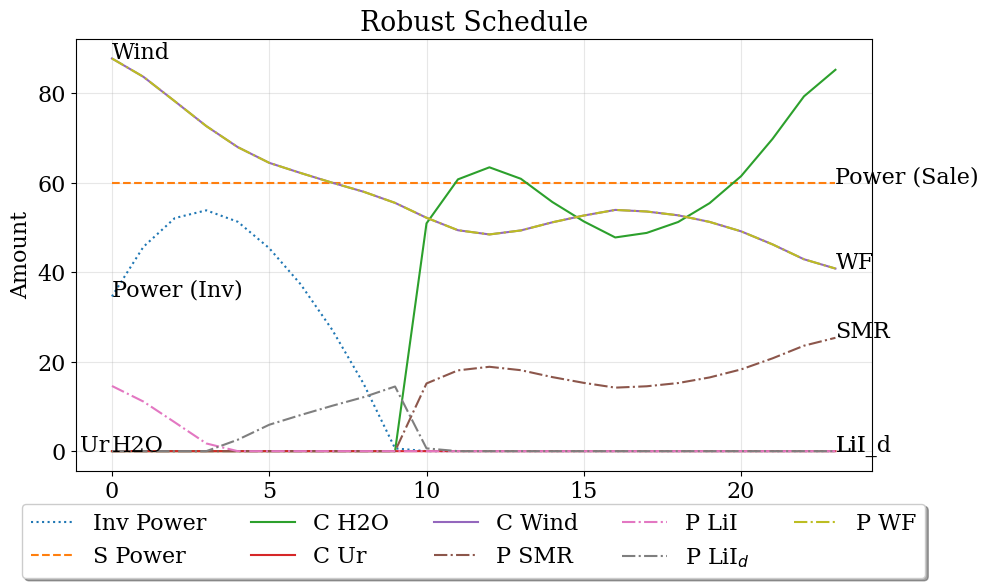

In [ ]:
sol3 = prog.solve_theta(numpy.array([[5.9]]))
# sol3 = prog.solve_theta(numpy.array([[0.1]]))


# time_sols = sol3.sol.reshape(24, -1)
# plt.subplots(figsize=(20, 10))
# labels = ['Inv','Sale of Power','Cons. H20','Cons. U','Cons. Wind','Prod. Nucluer','Prod. LiIon','Prod. LiIon Discharch','Prod. Windfarm']
# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)
# plt.savefig('baba.pdf')

# plt.subplots(figsize=(20, 10))
time_sols = sol3.sol.reshape(24, -1)
labels = ['Inv Power','S Power','C H2O','C Ur','C Wind','P SMR','P LiI',r'P LiI$_d$','P WF']
lines = ['dotted', 'dashed', 'solid','solid', 'solid', 'dashdot', 'dashdot', 'dashdot', 'dashdot']
annot = ['Power (Inv)', 'Power (Sale)', 'H2O', 'Ur', 'Wind', 'SMR', 'LiI', 'LiI_d', 'WF']
annot_loc = ['b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'a']
# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)

# plt.savefig('baba_nominal.pdf')
from matplotlib import rc
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(normalize(obj3), normalize(obj4), s=10, color='steelblue')
for i in range(9):
    ax.plot(list(range(24)), time_sols[:,i], label=labels[i], linestyle = lines[i])
    if annot[i] == 'Ur':
        ax.annotate(annot[i], xy = (-1, time_sols[:,i][0]))
    else:
        if annot_loc[i] == 'a':
            ax.annotate(annot[i], xy = (23, time_sols[:,i][23]))
        if annot_loc[i] == 'b':
            ax.annotate(annot[i], xy = (0, time_sols[:,i][0]))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=5)

# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
# ax.set_xticklabels(list(range(24)))

# xtick_positions = np.linspace(0, 24, 24)

# plt.xticks(list(range(24)), list(range(24)), rotation = 45)
# plt.legend()
plt.title(f'Robust Schedule')
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.grid(alpha=0.3)
plt.rcdefaults()
plt.tight_layout()
plt.savefig('baba_6.pdf')
plt.savefig('baba_6.png', dpi = 400)




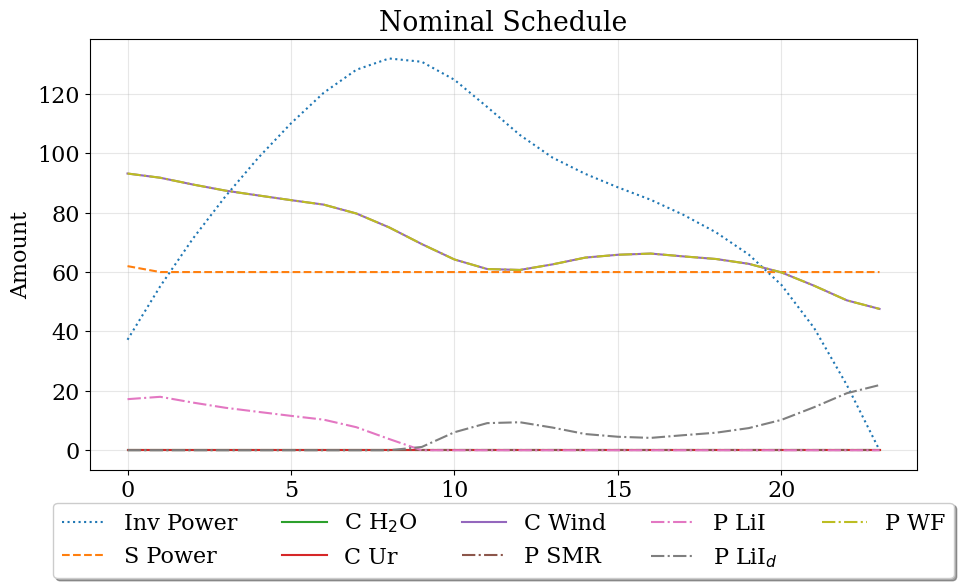

In [ ]:
sol3 = prog.solve_theta(numpy.array([[0.00001]]))
# plt.subplots(figsize=(20, 10))
time_sols = sol3.sol.reshape(24, -1)
labels = ['Inv Power','S Power',r'C H$_2$O','C Ur','C Wind','P SMR','P LiI',r'P LiI$_d$','P WF']
lines = ['dotted', 'dashed', 'solid','solid', 'solid', 'dashdot', 'dashdot', 'dashdot', 'dashdot']

# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)

# plt.savefig('baba_nominal.pdf')
from matplotlib import rc
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(normalize(obj3), normalize(obj4), s=10, color='steelblue')
for i in range(9):
    ax.plot(list(range(24)), time_sols[:,i], label=labels[i], linestyle = lines[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=5)

# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
# ax.set_xticklabels(list(range(24)))

# xtick_positions = np.linspace(0, 24, 24)

# plt.xticks(wind_pred.index, list(range(24)), rotation = 45)
# plt.legend()
plt.title(f'Nominal Schedule')
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.grid(alpha=0.3)
plt.rcdefaults()
plt.tight_layout()
plt.savefig('baba_nominal.pdf')
plt.savefig('baba_nominal.png', dpi = 400)


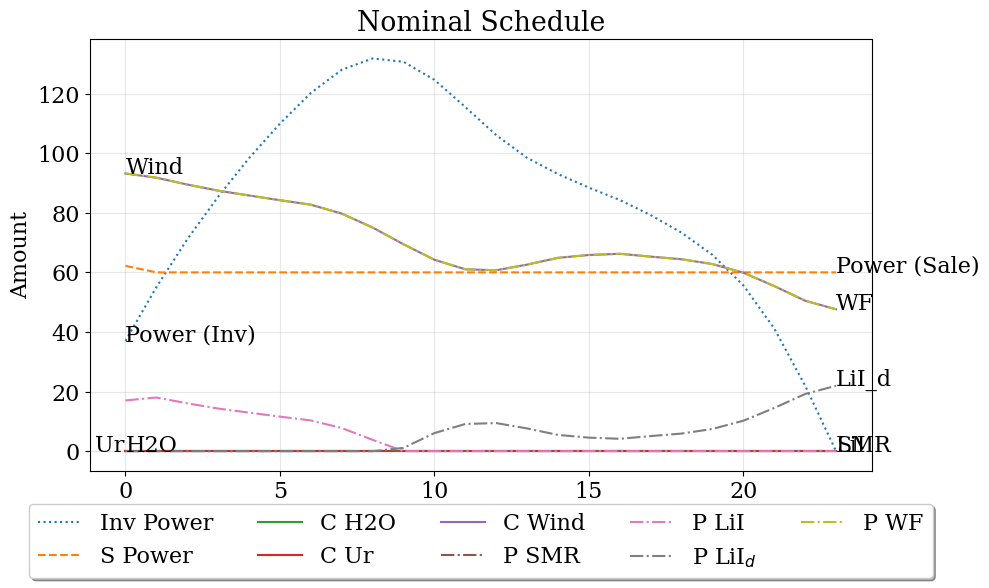

In [ ]:
sol3 = prog.solve_theta(numpy.array([[0.0001]]))
# sol3 = prog.solve_theta(numpy.array([[0.1]]))


# time_sols = sol3.sol.reshape(24, -1)
# plt.subplots(figsize=(20, 10))
# labels = ['Inv','Sale of Power','Cons. H20','Cons. U','Cons. Wind','Prod. Nucluer','Prod. LiIon','Prod. LiIon Discharch','Prod. Windfarm']
# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)
# plt.savefig('baba.pdf')

# plt.subplots(figsize=(20, 10))
time_sols = sol3.sol.reshape(24, -1)
labels = ['Inv Power','S Power','C H2O','C Ur','C Wind','P SMR','P LiI',r'P LiI$_d$','P WF']
lines = ['dotted', 'dashed', 'solid','solid', 'solid', 'dashdot', 'dashdot', 'dashdot', 'dashdot']
annot = ['Power (Inv)', 'Power (Sale)', 'H2O', 'Ur', 'Wind', 'SMR', 'LiI', 'LiI_d', 'WF']
annot_loc = ['b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'a']
# for i in range(9):
#     plt.plot(list(range(24)), time_sols[:,i])
# plt.legend(labels)

# plt.savefig('baba_nominal.pdf')
from matplotlib import rc
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(normalize(obj3), normalize(obj4), s=10, color='steelblue')
for i in range(9):
    ax.plot(list(range(24)), time_sols[:,i], label=labels[i], linestyle = lines[i])
    if annot[i] == 'Ur':
        ax.annotate(annot[i], xy = (-1, time_sols[:,i][0]))
    else:
        if annot_loc[i] == 'a':
            ax.annotate(annot[i], xy = (23, time_sols[:,i][23]))
        if annot_loc[i] == 'b':
            ax.annotate(annot[i], xy = (0, time_sols[:,i][0]))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
      fancybox=True, shadow=True, ncol=5)

# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
# ax.set_xticklabels(list(range(24)))

# xtick_positions = np.linspace(0, 24, 24)

# plt.xticks(list(range(24)), list(range(24)), rotation = 45)
# plt.legend()
plt.title(f'Nominal Schedule')
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.grid(alpha=0.3)
plt.rcdefaults()
plt.tight_layout()
plt.savefig('baba_6.pdf')
plt.savefig('baba_6.png', dpi = 400)

In [ ]:
list(zip(prog.c[:9], ['Inv','Sale of Power','Cons. H20','Cons. U','Cons. Wind','Prod. Nucluer','Prod. LiIon','Prod. LiIon Discharch','Prod. Windfarm']))

[(array([0.]), 'Inv'),
 (array([-10.]), 'Sale of Power'),
 (array([10.]), 'Cons. H20'),
 (array([10000.]), 'Cons. U'),
 (array([0.]), 'Cons. Wind'),
 (array([100000.]), 'Prod. Nucluer'),
 (array([0.]), 'Prod. LiIon'),
 (array([0.]), 'Prod. LiIon Discharch'),
 (array([0.]), 'Prod. Windfarm')]

In [ ]:
time_sols[10,:]

array([124.61814537,  60.        ,   0.        ,   0.        ,
        64.23992811,   0.        ,   0.        ,   6.06299001,
        64.23992811])

In [ ]:
list(zip(time_sols[10,:], ['Inv','Sale of Power','Cons. H20','Cons. U','Cons. Wind','Prod. Nucluer','Prod. LiIon','Prod. LiIon Discharch','Prod. Windfarm']))

[(124.61814537212058, 'Inv'),
 (60.0, 'Sale of Power'),
 (0.0, 'Cons. H20'),
 (0.0, 'Cons. U'),
 (64.2399281056839, 'Cons. Wind'),
 (0.0, 'Prod. Nucluer'),
 (0.0, 'Prod. LiIon'),
 (6.062990011425479, 'Prod. LiIon Discharch'),
 (64.23992810568392, 'Prod. Windfarm')]

In [ ]:
list(zip(time_sols[11,:], ['Inv','Sale of Power','Cons. H20','Cons. U','Cons. Wind','Prod. Nucluer','Prod. LiIon','Prod. LiIon Discharch','Prod. Windfarm']))

[(115.49382014607627, 'Inv'),
 (60.0, 'Sale of Power'),
 (0.0, 'Cons. H20'),
 (0.0, 'Cons. U'),
 (61.03453005743597, 'Cons. Wind'),
 (0.0, 'Prod. Nucluer'),
 (0.0, 'Prod. LiIon'),
 (9.1243252260443, 'Prod. LiIon Discharch'),
 (61.03453005743597, 'Prod. Windfarm')]

array([ 0.57735027,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.57735027,  0.57735027,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

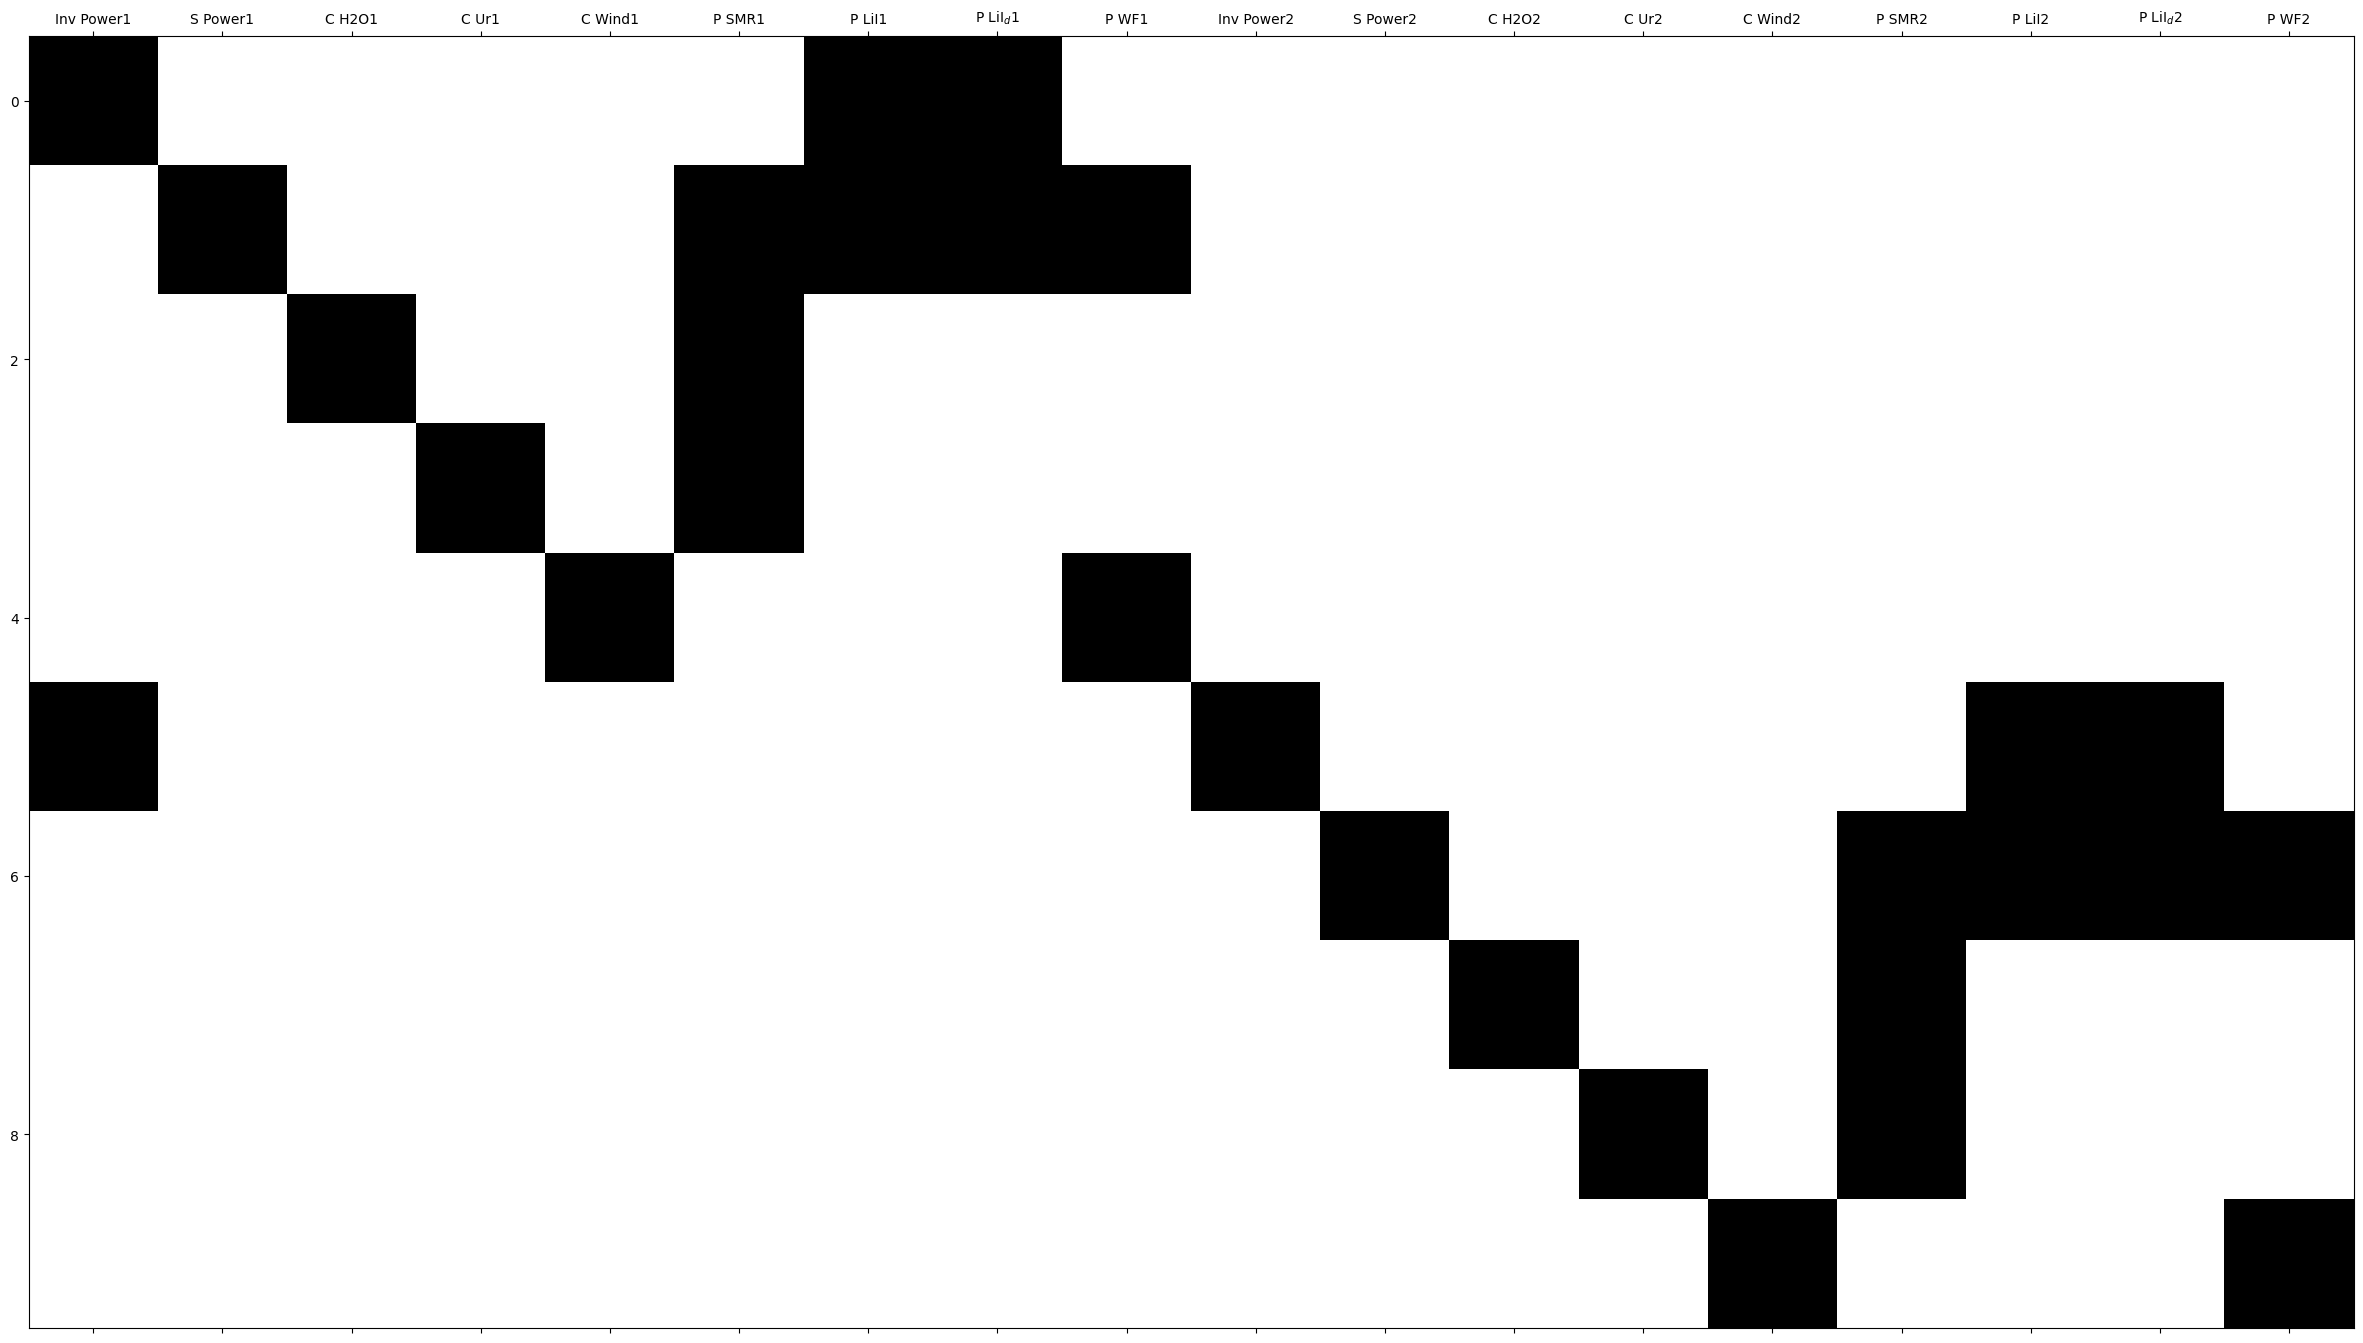

In [ ]:
plt.subplots(figsize=(30, 30))
plt.spy(prog.A[:10,:18], aspect='equal')
p = plt.xticks(list(range(18)),[*[x + '1' for x in labels],*[x + '2' for x in labels]])
prog.A[0, :18]

([<matplotlib.axis.XTick at 0x23713b77d50>,
 [Text(0, 0, 'Inv Power1'),
  Text(1, 0, 'S Power1'),
  Text(2, 0, 'C H2O1'),
  Text(3, 0, 'C Ur1'),
  Text(4, 0, 'C Wind1'),
  Text(5, 0, 'P SMR1'),
  Text(6, 0, 'P LiI1'),
  Text(7, 0, 'P LiI$_d$1'),
  Text(8, 0, 'P WF1'),
  Text(9, 0, 'Inv Power2'),
  Text(10, 0, 'S Power2'),
  Text(11, 0, 'C H2O2'),
  Text(12, 0, 'C Ur2'),
  Text(13, 0, 'C Wind2'),
  Text(14, 0, 'P SMR2'),
  Text(15, 0, 'P LiI2'),
  Text(16, 0, 'P LiI$_d$2'),
  Text(17, 0, 'P WF2')])

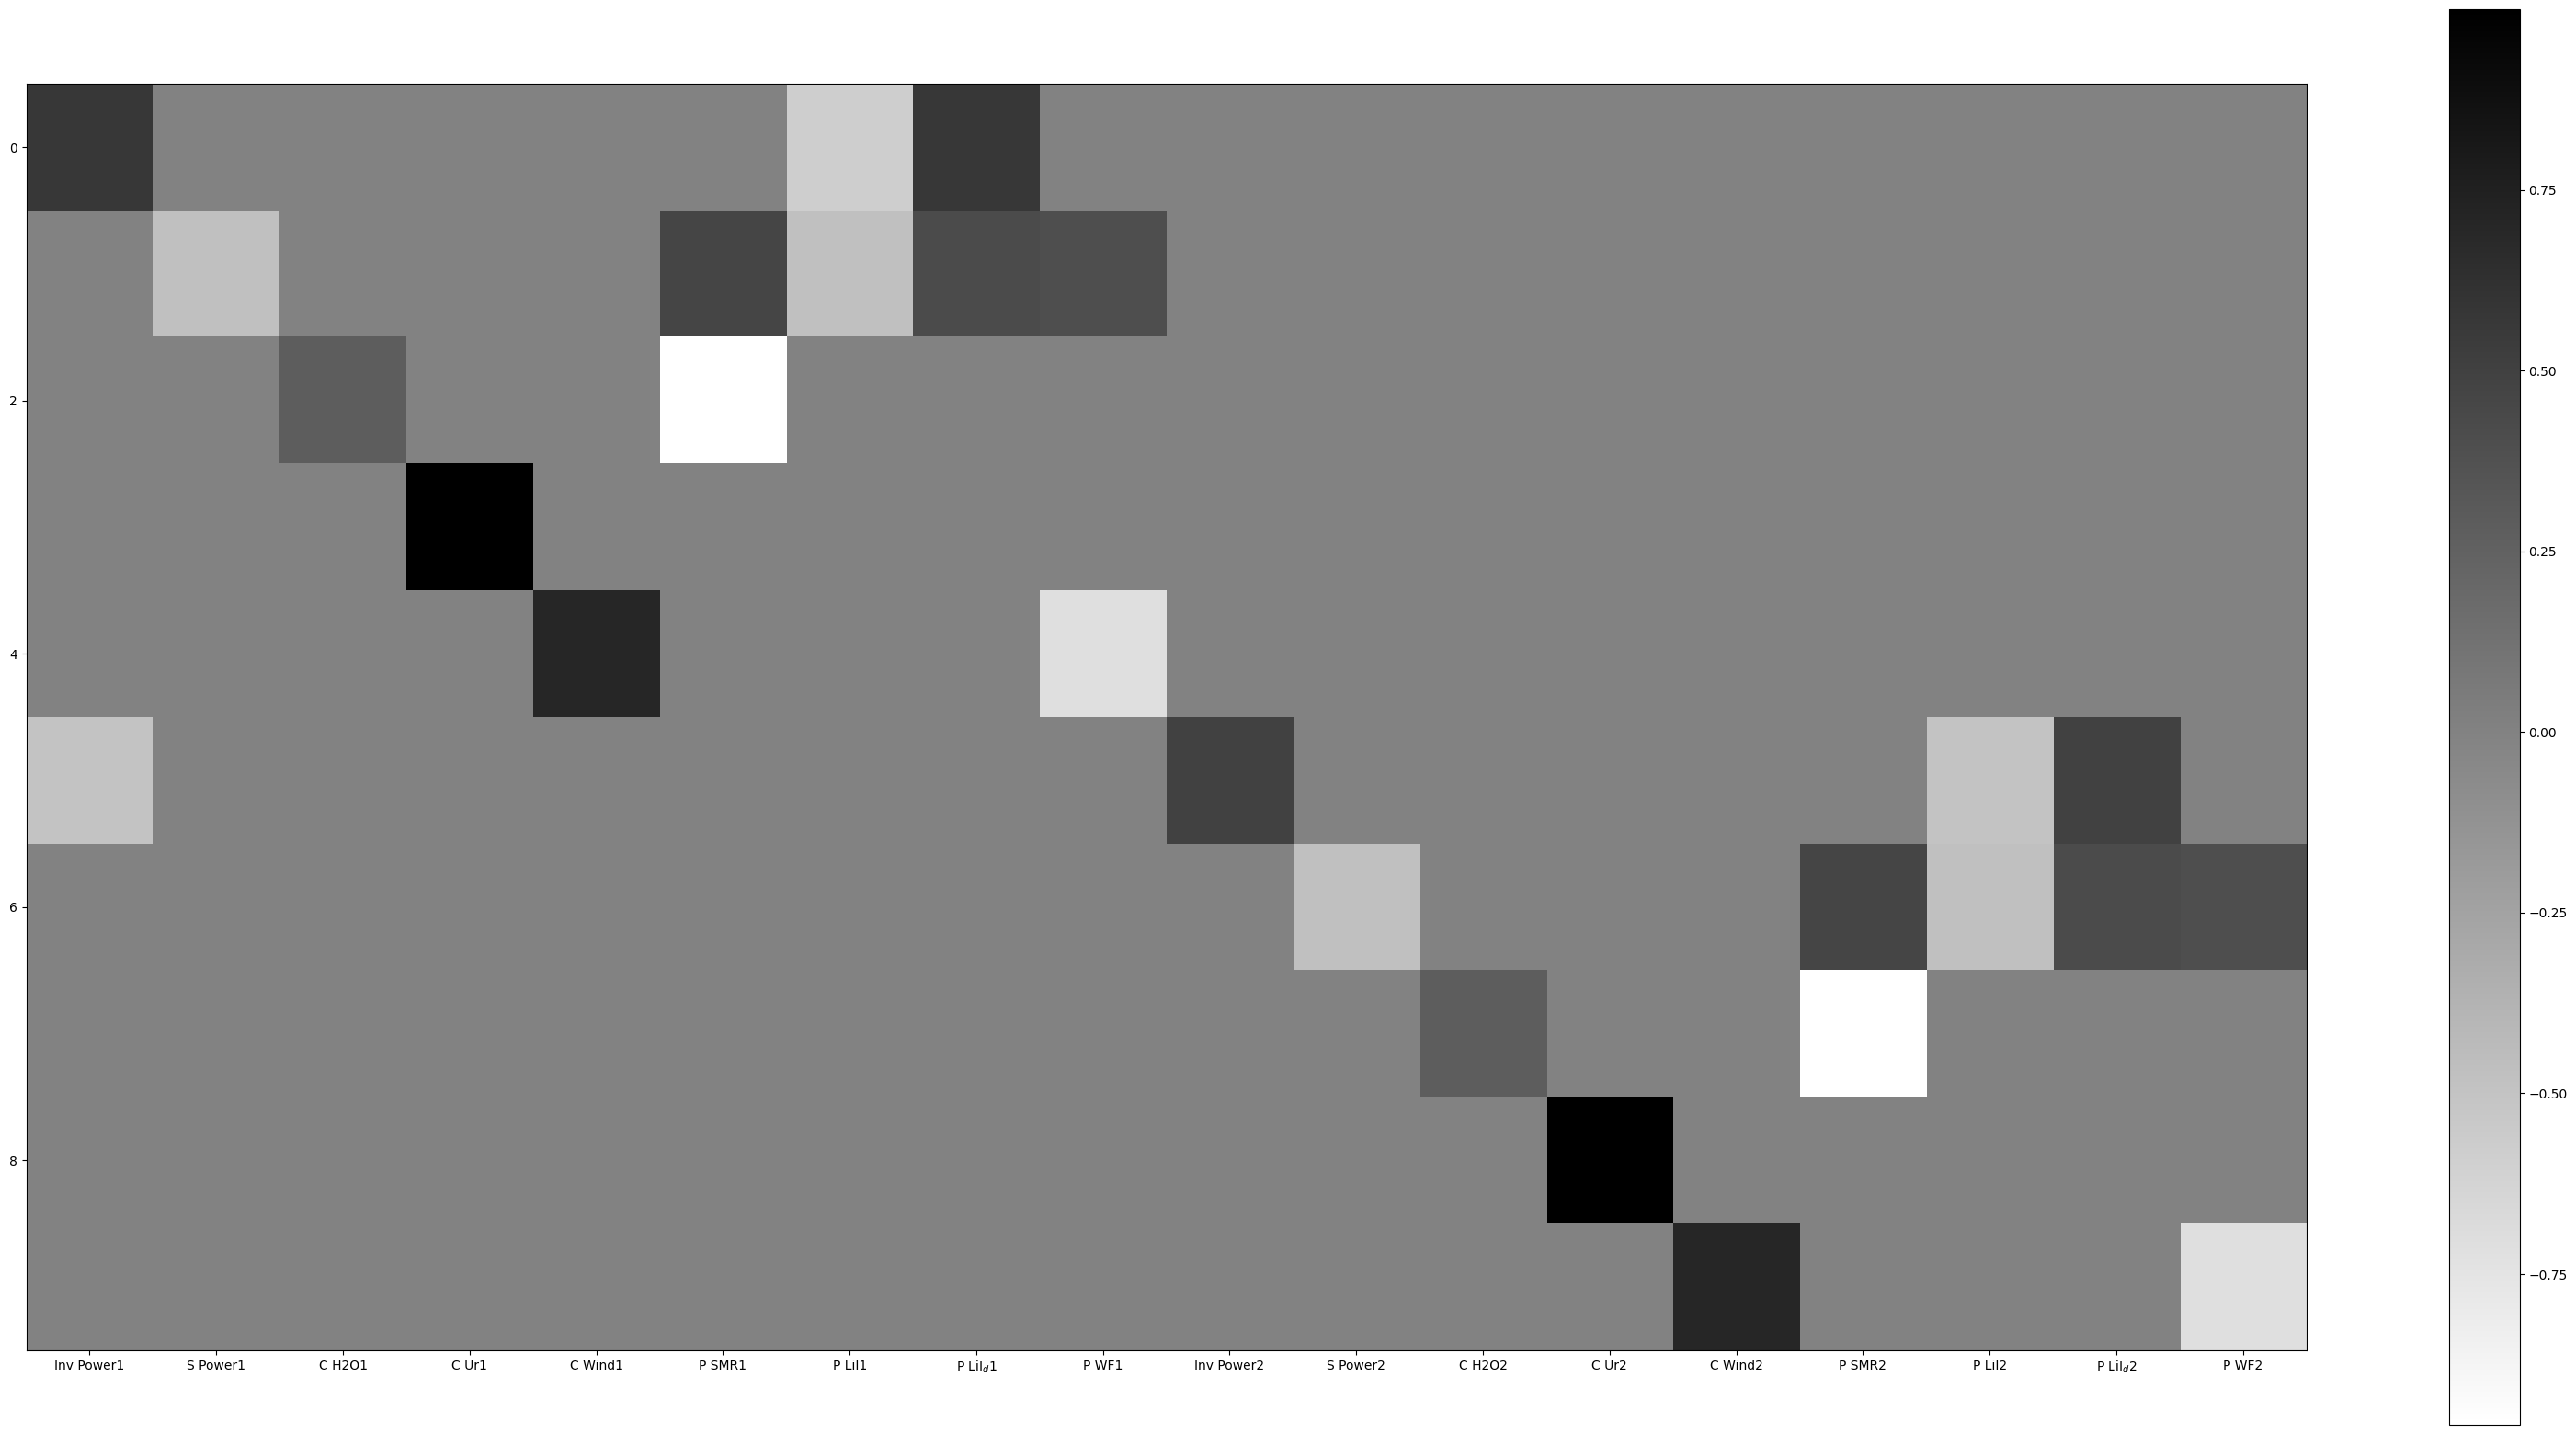

In [ ]:
d=prog.A[:10,:18]
plt.subplots(figsize=(40, 20))
plt.imshow(d,interpolation='none',cmap='binary')
plt.colorbar()

plt.xticks(list(range(18)),[*[x + '1' for x in labels],*[x + '2' for x in labels]])